## HMM
* https://arxiv.org/abs/1905.11824
* https://arxiv.org/abs/1311.4771

In [109]:
%load_ext autoreload
%autoreload 2

import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
from stocks import Stocks
from discrete_markov import DiscreteMarkov
    
register_matplotlib_converters()
    

stocks = Stocks('csvs/MSFT.csv')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


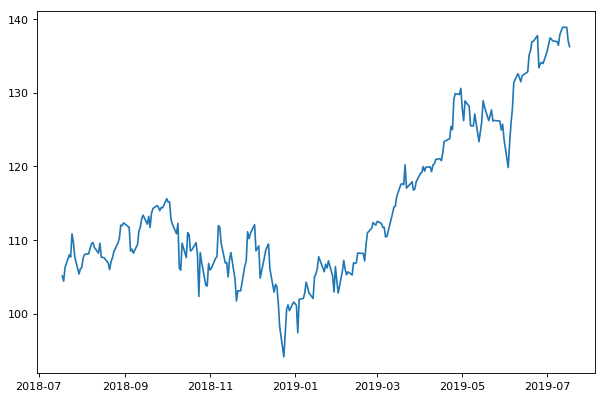

In [110]:
in_period = stocks.from_period("1Y")

plt.figure(figsize=(9, 6), dpi=80)
plt.plot(in_period.keys(), [row["Close"] for row in in_period.values()])

plt.show()


0.015069945431020852


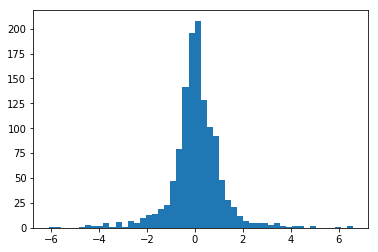

In [111]:
stocks.apply_naive_method()
print(stocks.mape("naive_method"))
plt.hist([row["prev_day_return"] for row in stocks.prices.values() if "prev_day_return" in row], bins=50)
plt.show()

In [122]:
stocks.quantise_prev_day_return()
discrete_markov = DiscreteMarkov(ngram=1)
discrete_markov.create_table([row["quantised_prev_day_return"] for row in stocks.before_period("1Y").values() if "quantised_prev_day_return" in row])

stocks.apply_discrete_markov_chain(discrete_markov.set_normalised_table())
stocks.mape("markov_method")



0.01015652982527084

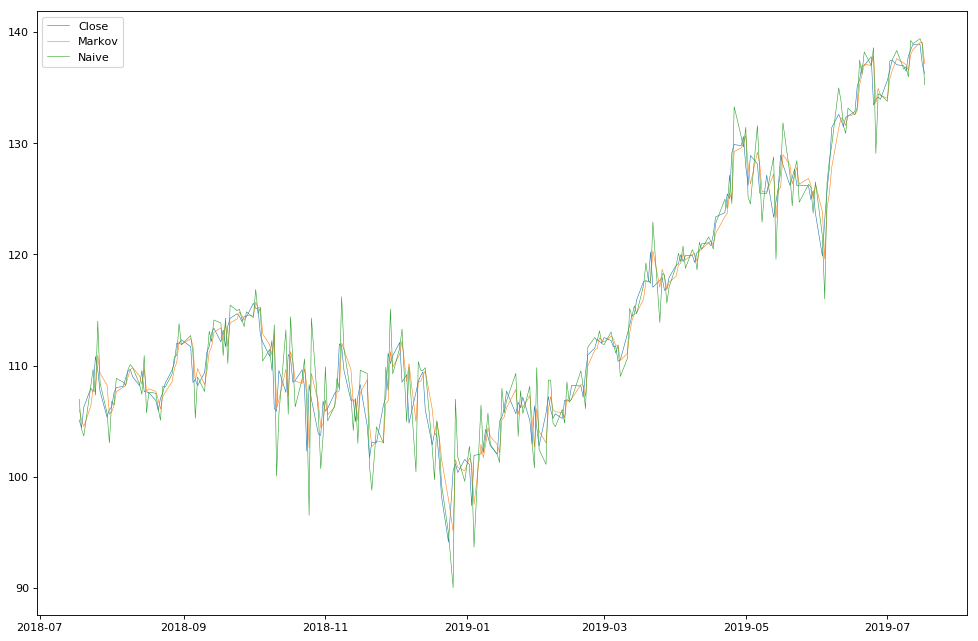

In [123]:
plt.figure(figsize=(15, 10), dpi=80)
plt.plot(in_period.keys(), [row["Close"] for row in in_period.values()], linewidth=0.5)
plt.plot(in_period.keys(), [row["markov_method"] for row in in_period.values()], linewidth=0.5)
plt.plot(in_period.keys(), [row["naive_method"] for row in in_period.values()], linewidth=0.5)
plt.legend(['Close', 'Markov', 'Naive'])
plt.show()

In [129]:
print(stocks.get_predict_returns("Close"))
print(stocks.get_predict_returns("naive_method"))
print(stocks.get_predict_returns("markov_method"))

943.6508601922746
1.1420676182225582
1.5937784299176667
